In [3]:
import numpy as np
import pandas as pd 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score 

*Data collections and preprocessing*

In [14]:
#read the dataset 
dataframe = pd.read_csv("C:/Users/Omar/Desktop/Loan-status-prediction/Loan-status-prediction.csv")

In [21]:
#print the type of the dataframe 
type(dataframe)

pandas.core.frame.DataFrame

In [26]:
#print the dataframe 
dataframe

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [8]:
#Numbers of Rows and Columns 
dataframe.shape

(614, 13)

In [11]:
#the data types of each features 
dataframe.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [13]:
#statistical measurements 
dataframe.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [16]:
#print the first 5 rows 
dataframe.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [27]:
#check for the number of NaN values 
dataframe.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [191]:
#drop all the missing values 
df = dataframe.dropna()

In [192]:
df.shape

(480, 13)

In [193]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [194]:
#label encoding No means 0s and Yes means 1s
df.replace({"Loan_Status" : {'N' : 0 , 'Y' : 1}}, inplace = True)

C:\Users\Omar\AppData\Local\Temp\ipykernel_32612\1780241176.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace({"Loan_Status" : {'N' : 0 , 'Y' : 1}}, inplace = True)


In [195]:
df.head(1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0


In [42]:
df['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [233]:
#replace 3+ values to 4 
df = df.replace(to_replace = '3+' , value = 4)

In [234]:
df['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

Data Visualisation 


<AxesSubplot:xlabel='Education', ylabel='count'>

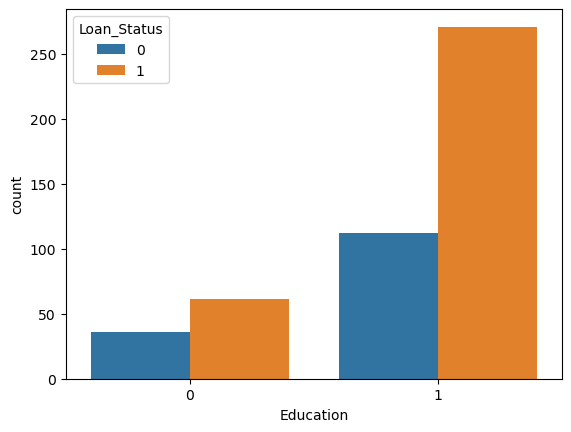

In [235]:
# Education and Loan status

sns.countplot(x= 'Education' , hue = 'Loan_Status' , data=df)

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

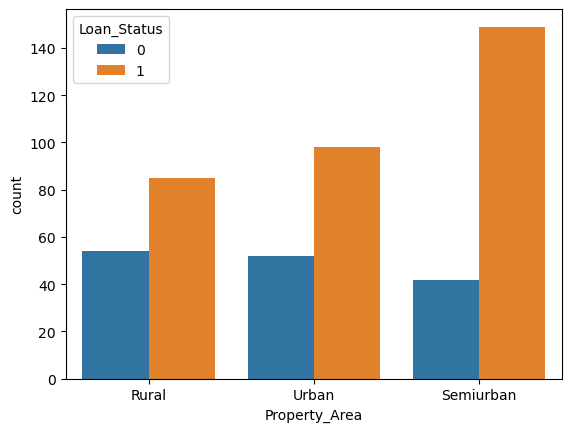

In [236]:
# Property area and Loan status

sns.countplot(x= 'Property_Area' , hue = 'Loan_Status' , data=df)

<AxesSubplot:xlabel='Gender', ylabel='count'>

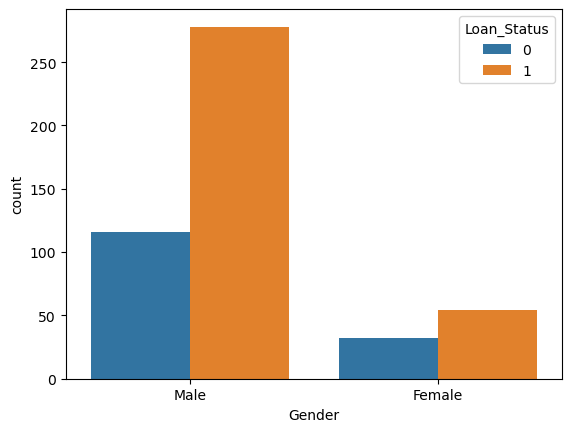

In [237]:
# Property area and Loan status

sns.countplot(x= 'Gender' , hue = 'Loan_Status' , data=df)

In [238]:
#label encoding Not graduted means 0s and graduated means 1s
df.replace({"Education" : {'Not Graduate' : 0 , 'Graduate' : 1}}, inplace = True)

In [239]:
#label encoding male means 1s and female means 0s
df.replace({"Gender" : {'Male' : 1 , 'Female' : 0}}, inplace = True)

In [240]:
#label encoding married yes means 1s and not married means 0 
df.replace({"Married" : {'Yes' : 1 , 'No' : 0}}, inplace = True)

In [241]:
#label encoding self employed  yes means 1s and no means 0 
df.replace({"Self_Employed" : {'Yes' : 1 , 'No' : 0}}, inplace = True)

In [242]:
#label encoding Property_Area  Rural means 0, Semiurban means 1 and urban means 2 
df.replace({"Property_Area" : {'Rural' : 0 , 'Semiurban' : 1 , 'Urban' : 2}}, inplace = True)

In [243]:
df.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents            object
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

In [244]:
X = df.drop(columns = ['Loan_ID' , 'Loan_Status']) #Features 
y = df['Loan_Status'] #output

In [245]:
#splite the dataset into training and testing 
X_train, X_test , y_train , y_test = train_test_split(X,y , test_size = 0.1 , stratify = y , random_state = 2)


In [246]:
print(X_train.shape , X.shape)

(432, 11) (480, 11)


In [247]:
classifier = svm.SVC(kernel = 'linear')

In [248]:
classifier

SVC(kernel='linear')

In [250]:
classifier.fit(X_train , y_train)

SVC(kernel='linear')

In [251]:
# input_dat1a = [[1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0]]
# input_data2 = [[1, 1, 0, 1, 0, 5000, 0.0, 66.0, 360.0, 1.0, 2]]

In [252]:
X_train_pred = classifier.predict(X_train)
training_accuracy = accuracy_score(X_train_pred, y_train)

In [253]:
print('accuracy on training data :' , training_accuracy)

accuracy on training data : 0.7986111111111112


In [254]:
X_test_pred = classifier.predict(X_test)
testing_accuracy = accuracy_score(X_test_pred, y_test)

In [255]:
print('accuracy on testing data :' , testing_accuracy)

accuracy on testing data : 0.8333333333333334


In [230]:
type(X_train)


pandas.core.frame.DataFrame

In [231]:
X_test
X_test_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0], dtype=int64)

In [216]:
# input_data2 = [[0,0, 0, 1, 0, 5000, 0.0, 66.0, 1000.0, 1.0, 5]]
# X_test_pred = classifier.predict(input_data2)
# X_test_pred

In [222]:
import pandas as pd

# Create an empty dictionary to store the data
input_data = {}

# Define the questions for each attribute
questions = {
    'Gender': 'Gender (Male/Female): ',
    'Married': 'Married (Yes/No): ',
    'Dependents': 'Dependents: ',
    'Education': 'Education (Graduate/Not Graduate): ',
    'Self_Employed': 'Self Employed (Yes/No): ',
    'ApplicantIncome': 'Applicant Income: ',
    'CoapplicantIncome': 'Coapplicant Income: ',
    'LoanAmount': 'Loan Amount: ',
    'Loan_Amount_Term': 'Loan Amount Term: ',
    'Credit_History': 'Credit History (1.0/0.0): ',
    'Property_Area': 'Property Area (Rural/Semiurban/Urban): ',
}

# Loop through the questions and collect user input
for key, question in questions.items():
    user_input = input(question)
    
    if key in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']:
        value = float(user_input)
    elif key == 'Credit_History':
        value = int(float(user_input))
    else:
        value = user_input

    input_data[key] = value

# Convert the dictionary to a DataFrame
df_result = pd.DataFrame([input_data])

# Display the DataFrame



# Make predictions using the SVM model
X_test_pred = classifier.predict(df_result)
print("SVM Model Predictions: ")
print("1 means they are eligible / 0 means they are not eligible   ")
print(X_test_pred)
print("User Input Data:")
df_result

Gender (Male/Female): 0
Married (Yes/No): 0
Dependents: 0
Education (Graduate/Not Graduate): 1
Self Employed (Yes/No): 0
Applicant Income: 15555
Coapplicant Income: 123456
Loan Amount: 12
Loan Amount Term: 12
Credit History (1.0/0.0): 1
Property Area (Rural/Semiurban/Urban): 1
SVM Model Predictions: 
1 means they are eligible / 0 means they are not eligible   
[1]
User Input Data:


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,0,0,1,0,15555.0,123456.0,12.0,12.0,1,1


In [256]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,1,1,4,1,0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2,1
